<a href="https://colab.research.google.com/github/drouvotlucas/Mathematical-modelling/blob/main/Moindres_d%C3%A9viations_absolues_ADMM_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moindres Déviations Absolues : l'algorithme ADMM



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Fonctions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def droite(A, x):
    return A[0]*x + A[1]

In [ ]:
#Seuillage des composantes d'un vecteur
def seuille(a, k) :
    # numpy automatically applies functions to each element of the array
    return np.sign(a)*np.maximum(0, np.abs(a) - k)

In [ ]:
#Fonction principale qui effectue les moindres déviations absoluesavec ADMM
def lav(A, b, x0, u0, z0) :
    x = x0
    z = z0
    u = u0
    r = 50
    alpha = 1/r
    epsilon = 0.0000001
    iter_max = 1000
    At = np.transpose(A)
    i = 0
    cond=2*epsilon
    while (cond>epsilon) :
        xx = np.linalg.solve(np.dot(At, A), np.dot(At, b+z-u))
        y  = np.dot(A, xx) - b
        zz = seuille(y + u, alpha)
        uu = y + u - zz
        cond = ((np.sqrt(np.square(np.linalg.norm(xx-x)) + np.square(np.linalg.norm(zz-z)) + np.square(np.linalg.norm(uu-u)))))/np.sqrt(np.square(np.linalg.norm(xx))+ np.square(np.linalg.norm(zz)) + np.square(np.linalg.norm(uu)))
        u = uu
        z = zz
        x = xx
        i+= 1

    return x, i

## Test du code avec les données de l'énoncé

In [ ]:
# Test du code avec les données de l'énoncé
v = np.array([[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0]])
t = np.array([[0.0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9],[1.0]])
b = np.array([[2.06],[2.12],[2.32],[2.02],[2.76],[3.04],[2.83],[3.15],[3.36],[3.68],[3.96]])
A = np.hstack((v, t))
At=np.transpose(A)
x0 = np.array([[0], [0]])
u0 = np.array([[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]])
z0 = np.array([[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]])


In [ ]:
x, i = lav(A, b, x0, u0, z0)
print(f"Solution optimale :\n {x}\nNombre d'itérations : {i}\n")

Solution optimale :
 [[1.93142885]
 [1.94285689]]
Nombre d'itérations : 132



### Comparaison avec les moindres carrés

[[1.88227273]
 [1.92636364]]


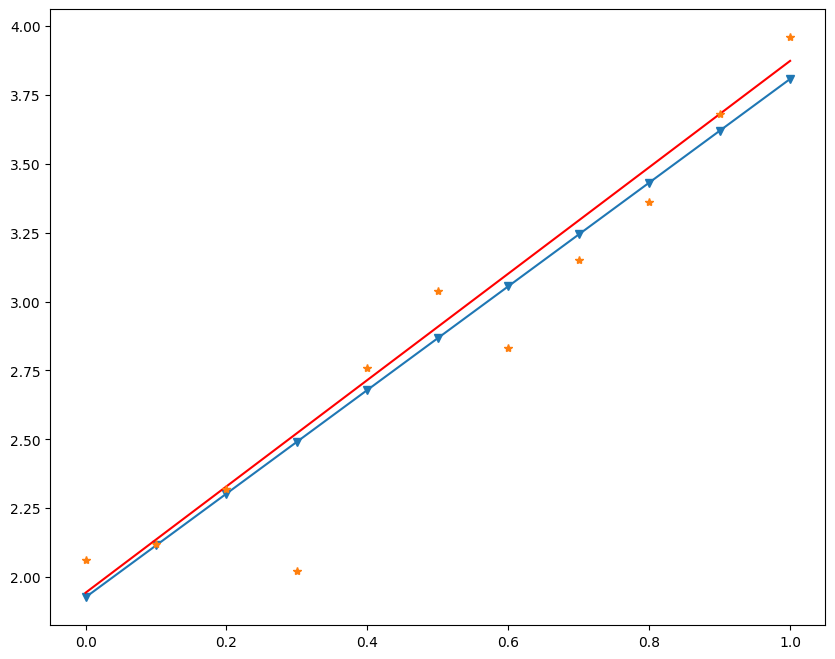

In [ ]:
x1 = np.linalg.lstsq(np.dot(At,A),np.dot(At,b),rcond=None)[0]
plt.figure(figsize=(10,8))
plt.plot(t,(x1[0])*t + x1[1],'-v',label="moindre carré")
plt.plot(t,x[0]*t + x[1],'-r',label="ADMM")
plt.plot(t,b,"*")
print(x1)

### Calcul des erreurs et comparaison

In [ ]:
norme1_admm=[]
norme2_admm=[]

norme1_mcarrees=[]
norme2_mcarrees=[]

norme1_admm.append(np.linalg.norm(np.dot(A,x)-b,1))
norme2_admm.append(np.linalg.norm(np.dot(A,x)-b,2))
print("erreur norme 1= ", norme1_admm[-1])
print("erreur norme 2= ", norme2_admm[-1])

norme1_mcarrees.append(np.linalg.norm(np.dot(A,x1)-b,1))
norme2_mcarrees.append(np.linalg.norm(np.dot(A,x1)-b,2))
print("erreur norme 1= ", norme1_mcarrees[-1])
print("erreur norme 2= ", norme2_mcarrees[-1])

erreur norme 1=  1.4371432689284898
erreur norme 2=  0.6299628932424255
erreur norme 1=  1.5847272727272699
erreur norme 2=  0.6002567632423493


On voit que l'ADMM minimise l'erreur pour la norme 1 et que les moindres carrées minimise l'erreur pour la norme 2.

## Test du code avec les données du fichier chomage

In [ ]:
A = np.array([
    [1.0000e+00,1.9980e+03],
   [1.0000e+00,1.9990e+03],
   [1.0000e+00,2.0000e+03],
   [1.0000e+00,2.0010e+03],
   [1.0000e+00,2.0020e+03],
   [1.0000e+00,2.0030e+03],
   [1.0000e+00,2.0040e+03],
   [1.0000e+00,2.0050e+03],
   [1.0000e+00,2.0060e+03],
   [1.0000e+00,2.0070e+03],
   [1.0000e+00,2.0080e+03],
   [1.0000e+00,2.0090e+03],
   [1.0000e+00,2.0100e+03],
   [1.0000e+00,2.0110e+03],
   [1.0000e+00,2.0120e+03],
   [1.0000e+00,2.0130e+03],
   [1.0000e+00,2.0140e+03],
   [1.0000e+00,2.0150e+03],
   [1.0000e+00,2.0160e+03],
   [1.0000e+00,2.0170e+03],
   [1.0000e+00,2.0180e+03],
   [1.0000e+00,2.0190e+03],
   [1.0000e+00,2.0200e+03],
   [1.0000e+00,2.0210e+03]
])

b= np.array([
    6.6278e+00,
    7.7969e+00,
    7.2965e+00,
    6.6705e+00,
    7.1719e+00,
    6.0287e+00,
    6.0154e+00,
    6.8630e+00,
    6.8845e+00,
    6.9907e+00,
    6.0793e+00,
    7.1949e+00,
    8.5884e+00,
    8.0827e+00,
    7.7297e+00,
    8.6322e+00,
    8.8011e+00,
    8.7400e+00,
    8.6801e+00,
    7.7332e+00,
    7.8470e+00,
    6.9491e+00,
    7.3793e+00,
    7.9120e+00
])
At=np.transpose(A)
x0 = np.transpose(np.zeros(np.shape(A)[1]))
z0 = np.transpose(np.zeros(np.shape(b)[0]))
u0 = np.transpose(np.zeros(np.shape(b)[0]))
x, i = lav(A, b, x0, u0, z0)
print(f"Solution optimale :\n {x}\nNombre d'itérations : {i}\n")

Solution optimale :
 [-1.09613428e+02  5.81787917e-02]
Nombre d'itérations : 241



### Comparaison avec les moindres carrés

In [ ]:
x1 = np.linalg.lstsq(np.dot(At,A),np.dot(At,b),rcond=None)[0]
print(f"Solution optimale moindre carrés:\n {x1}")


Solution optimale moindre carrés:
 [-1.21687203e+02  6.42611714e-02]


### Calcul des erreurs et comparaison

In [ ]:
norme1_admm=[]
norme2_admm=[]

norme1_mcarrees=[]
norme2_mcarrees=[]

norme1_admm.append(np.linalg.norm(np.dot(A,x)-b,1))
norme2_admm.append(np.linalg.norm(np.dot(A,x)-b,2))
print("erreur norme 1= ", norme1_admm[-1])
print("erreur norme 2= ", norme2_admm[-1])

norme1_mcarrees.append(np.linalg.norm(np.dot(A,x1)-b,1))
norme2_mcarrees.append(np.linalg.norm(np.dot(A,x1)-b,2))
print("erreur norme 1= ", norme1_mcarrees[-1])
print("erreur norme 2= ", norme2_mcarrees[-1])

erreur norme 1=  13.991855640628266
erreur norme 2=  3.620571657656724
erreur norme 1=  14.512150362078078
erreur norme 2=  3.540457130936422


que l'ADMM minimise l'erreur pour la norme 1 et que les moindres carrées minimise l'erreur pour la norme 2.

## Test du code avec les données du fichier satisfaction

In [ ]:
A = np.array([
    [51,30,39,61,92,45],
    [64,51,54,63,73,47],
    [70,68,69,76,86,48],
    [63,45,47,54,84,35],
    [78,56,66,71,83,47],
    [55,49,44,54,49,34],
    [67,42,56,66,68,35],
    [75,50,55,70,66,41],
    [82,72,67,71,83,31],
    [61,45,47,62,80,41],
    [53,53,58,58,67,34],
    [60,47,39,59,74,41],
    [62,57,42,55,63,25],
    [83,83,45,59,77,35],
    [77,54,72,79,77,46],
    [90,50,72,60,54,36],
    [85,64,69,79,79,63],
    [60,65,75,55,80,60],
    [70,46,57,75,85,46],
    [58,68,54,64,78,52],
    [40,33,34,43,64,33],
    [61,52,62,66,80,41],
    [66,52,50,63,80,37],
    [37,42,58,50,57,49],
    [54,42,48,66,75,33],
    [77,66,63,88,76,72],
    [75,58,74,80,78,49],
    [57,44,45,51,83,38],
    [85,71,71,77,74,55],
    [82,39,59,64,78,39]
])

b = np.transpose(np.array([43,63,71,61,81,43,58,71,72,67,64,67,69,68,77,81,74,65,65,50,50,64,53,40,63,66,78,48,85,82]))
At=np.transpose(A)
x0 = np.transpose(np.zeros(np.shape(A)[1]))
z0 = np.transpose(np.zeros(np.shape(b)[0]))
u0 = np.transpose(np.zeros(np.shape(b)[0]))
x, i = lav(A, b, x0, u0, z0)
print(f"Solution optimale :\n {x}\nNombre d'itérations : {i}\n")

Solution optimale :
 [ 0.57136269 -0.08908366  0.36724011  0.16453449  0.16146668 -0.30558383]
Nombre d'itérations : 4305



### Comparaison avec les moindres carrés

In [ ]:
x1 = np.linalg.lstsq(np.dot(At,A),np.dot(At,b),rcond=None)[0]
print(f"Solution optimale moindre carrés:\n {x1}")

Solution optimale moindre carrés:
 [ 0.62339189 -0.05847126  0.34502167  0.09910353  0.12930038 -0.21968958]


### Calcul des erreurs et comparaison

In [ ]:
norme1_admm=[]
norme2_admm=[]

norme1_mcarrees=[]
norme2_mcarrees=[]

norme1_admm.append(np.linalg.norm(np.dot(A,x)-b,1))
norme2_admm.append(np.linalg.norm(np.dot(A,x)-b,2))
print("erreur norme 1= ", norme1_admm[-1])
print("erreur norme 2= ", norme2_admm[-1])

norme1_mcarrees.append(np.linalg.norm(np.dot(A,x1)-b,1))
norme2_mcarrees.append(np.linalg.norm(np.dot(A,x1)-b,2))
print("erreur norme 1= ", norme1_mcarrees[-1])
print("erreur norme 2= ", norme2_mcarrees[-1])

erreur norme 1=  151.4267782338262
erreur norme 2=  35.22679881227773
erreur norme 1=  156.63121726466449
erreur norme 2=  34.529414430650746


que l'ADMM minimise l'erreur pour la norme 1 et que les moindres carrées minimise l'erreur pour la norme 2.

## Test du code avec les données du fichier prix

In [ ]:
A = np.array([
   [ 4.9176, 1.0000,  3.4720, 0.9980, 1.0000, 7.0000, 4.0000, 42.0000, 3.0000, 1.0000, 0],
   [ 5.0208, 1.0000,  3.5310, 1.5000, 2.0000, 7.0000, 4.0000, 62.0000, 1.0000, 1.0000, 0],
   [ 4.5429, 1.0000,  2.2750, 1.1750, 1.0000, 6.0000, 3.0000, 40.0000, 2.0000, 1.0000, 0],
   [ 4.5573, 1.0000,  4.0500, 1.2320, 1.0000, 6.0000, 3.0000, 54.0000, 4.0000, 1.0000, 0],
   [ 5.0597, 1.0000,  4.4550, 1.1210, 1.0000, 6.0000, 3.0000, 42.0000, 3.0000, 1.0000, 0],
   [ 3.8910, 1.0000,  4.4550, 0.9880, 1.0000, 6.0000, 3.0000, 56.0000, 2.0000, 1.0000, 0],
   [ 5.8980, 1.0000,  5.8500, 1.2400, 1.0000, 7.0000, 3.0000, 51.0000, 2.0000, 1.0000, 1.0000],
   [ 5.6039, 1.0000,  9.5200, 1.5010,      0, 6.0000, 3.0000, 32.0000, 1.0000, 1.0000, 0],
   [16.4202, 2.5000,  9.8000, 3.4200, 2.0000,10.0000, 5.0000, 42.0000, 2.0000, 1.0000, 1.0000],
   [14.4598, 2.5000, 12.8000, 3.0000, 2.0000, 9.0000, 5.0000, 14.0000, 4.0000, 1.0000, 1.0000],
   [ 5.8282, 1.0000,  6.4350, 1.2250, 2.0000, 6.0000, 3.0000, 32.0000, 1.0000, 1.0000, 0],
   [ 5.3003, 1.0000,  4.9883, 1.5520, 1.0000, 6.0000, 3.0000, 30.0000, 1.0000, 2.0000, 0],
   [ 6.2712, 1.0000,  5.5200, 0.9750, 1.0000, 5.0000, 2.0000, 30.0000, 1.0000, 2.0000, 0],
   [ 5.9592, 1.0000,  6.6660, 1.1210, 2.0000, 6.0000, 3.0000, 32.0000, 2.0000, 1.0000, 0],
   [ 5.0500, 1.0000,  5.0000, 1.0200,      0, 5.0000, 2.0000, 46.0000, 4.0000, 1.0000, 1.0000],
   [ 5.6039, 1.0000,  9.5200, 1.5010,      0, 6.0000, 3.0000, 32.0000, 1.0000, 1.0000, 0],
   [ 8.2464, 1.5000,  5.1500, 1.6640, 2.0000, 8.0000, 4.0000, 50.0000, 4.0000, 1.0000, 0],
   [ 6.6969, 1.5000,  6.9020, 1.4880, 1.5000, 7.0000, 3.0000, 22.0000, 1.0000, 1.0000, 1.0000],
   [ 7.7841, 1.5000,  7.1020, 1.3760, 1.0000, 6.0000, 3.0000, 17.0000, 2.0000, 1.0000, 0],
   [ 9.0384, 1.0000,  7.8000, 1.5000, 1.5000, 7.0000, 3.0000, 23.0000, 3.0000, 3.0000, 0],
   [ 5.9894, 1.0000,  5.5200, 1.2560, 2.0000, 6.0000, 3.0000, 40.0000, 4.0000, 1.0000, 1.0000],
   [ 7.5422, 1.5000,  4.0000, 1.6900, 1.0000, 6.0000, 3.0000, 22.0000, 1.0000, 1.0000, 0],
   [ 8.7951, 1.5000,  9.8900, 1.8200, 2.0000, 8.0000, 4.0000, 50.0000, 1.0000, 1.0000, 1.0000],
   [ 6.0931, 1.5000,  6.7265, 1.6520, 1.0000, 6.0000, 3.0000, 44.0000, 4.0000, 1.0000, 0],
   [ 8.3607, 1.5000,  9.1500, 1.7770, 2.0000, 8.0000, 4.0000, 48.0000, 1.0000, 1.0000, 1.0000],
   [ 8.1400, 1.0000,  8.0000, 1.5040, 2.0000, 7.0000, 3.0000,  3.0000, 1.0000, 3.0000, 0],
   [ 9.1416, 1.5000,  7.3262, 1.8310, 1.5000, 8.0000, 4.0000, 31.0000, 4.0000, 1.0000, 0],
   [12.0000, 1.5000,  5.0000, 1.2000, 2.0000, 6.0000, 3.0000, 30.0000, 3.0000, 1.0000, 1.0000]
])

b = np.array([
    25.9000,
    29.5000,
    27.9000,
    25.9000,
    29.9000,
    29.9000,
    30.9000,
    28.9000,
    84.9000,
    82.9000,
    35.9000,
    31.5000,
    31.0000,
    30.9000,
    30.0000,
    28.9000,
    36.9000,
    41.9000,
    40.5000,
    43.9000,
    37.5000,
    37.9000,
    44.5000,
    37.9000,
    38.9000,
    36.9000,
    45.8000,
    41.0000
])

At=np.transpose(A)
x0 = np.transpose(np.zeros(np.shape(A)[1]))
z0 = np.transpose(np.zeros(np.shape(b)[0]))
u0 = np.transpose(np.zeros(np.shape(b)[0]))
x, i = lav(A, b, x0, u0, z0)
print(f"Solution optimale :\n {x}\nNombre d'itérations : {i}\n")

Solution optimale :
 [ 1.68666446 11.31232918  0.03172854  8.54042216  1.79157238 -2.39865449
  2.34877595 -0.05837365  0.74366349  3.48443516  4.82196205]
Nombre d'itérations : 11399



### Comparaison avec les moindres carrés

In [ ]:
x1 = np.linalg.lstsq(np.dot(At,A),np.dot(At,b),rcond=None)[0]
print(f"Solution optimale moindre carrés:\n {x1}")

Solution optimale moindre carrés:
 [ 0.78476424 10.38692747  0.22634789 12.46564715  1.81521629 -0.86999651
 -0.25879357 -0.05848319  1.02605806  1.79247025  2.68075214]


### Calcul des erreurs et comparaison

In [ ]:
norme1_admm=[]
norme2_admm=[]

norme1_mcarrees=[]
norme2_mcarrees=[]

norme1_admm.append(np.linalg.norm(np.dot(A,x)-b,1))
norme2_admm.append(np.linalg.norm(np.dot(A,x)-b,2))
print("erreur norme 1= ", norme1_admm[-1])
print("erreur norme 2= ", norme2_admm[-1])

norme1_mcarrees.append(np.linalg.norm(np.dot(A,x1)-b,1))
norme2_mcarrees.append(np.linalg.norm(np.dot(A,x1)-b,2))
print("erreur norme 1= ", norme1_mcarrees[-1])
print("erreur norme 2= ", norme2_mcarrees[-1])

erreur norme 1=  62.43271077073345
erreur norme 2=  19.85675837377815
erreur norme 1=  70.45260989385908
erreur norme 2=  16.19766320936429


que l'ADMM minimise l'erreur pour la norme 1 et que les moindres carrées minimise l'erreur pour la norme 2.

## Test du code avec les données m=1000 n=100

In [ ]:
A = np.genfromtxt("/content/drive/MyDrive/isima/ISIMA ZZ3/opti convexe/tp1/lav_A_1000x100.dat", delimiter=" ", dtype=np.float64)
b = np.genfromtxt("/content/drive/MyDrive/isima/ISIMA ZZ3/opti convexe/tp1/lav_b_1000x1.dat", delimiter=" ", dtype=np.float64)

At=np.transpose(A)
x0 = np.transpose(np.zeros(np.shape(A)[1]))
z0 = np.transpose(np.zeros(np.shape(b)[0]))
u0 = np.transpose(np.zeros(np.shape(b)[0]))
x, i = lav(A, b, x0, u0, z0)
print(f"Solution optimale :\n {x}\nNombre d'itérations : {i}\n")

Solution optimale :
 [-17.02108621  10.40348411  -3.20110322 -20.77227115  12.58900524
  -7.87233591   1.8294263   -7.00455665   5.36937237   5.70035994
  -1.6244547   -9.06318963  -1.98079095   1.76497653  -3.89393986
   3.03206504 -13.02042604  -6.8330264  -13.14227105  -6.50063992
   4.13017214   7.67447531  18.13838481  10.31270265  -6.46702708
  -5.02471447  -7.14505198 -16.82990432   9.99099314 -26.67832613
  12.38031386  -2.60848551  -8.01675082   9.13210095  -2.79204341
  18.50228667   7.4192232  -14.31686403 -13.34160685  -0.44503369
 -20.5384469   10.50607563   1.82429255 -15.28713941   0.12518383
  -5.69188655  17.81372309  10.35070776   8.90305281   1.26467361
  -7.11177289  -4.81473177 -13.76056791  -6.69325232   7.45153308
  17.10533619   7.09875226 -12.30861425  25.35266875  -2.05630364
  -0.60221046  10.63083172   3.51389139  -9.95361149 -11.87984229
  -2.0960608    7.50682116  12.67214418  -0.50508105  -2.7993983
  -3.3593613   -5.08041619 -10.89435578   3.70201528  11

### Comparaison avec les moindres carrés

In [ ]:
x1 = np.linalg.lstsq(np.dot(At,A),np.dot(At,b),rcond=None)[0]
print(f"Solution optimale moindre carrés:\n {x1}")

Solution optimale moindre carrés:
 [-17.02108621  10.40348411  -3.20110322 -20.77227115  12.58900524
  -7.87233591   1.8294263   -7.00455665   5.36937237   5.70035994
  -1.6244547   -9.06318963  -1.98079095   1.76497653  -3.89393986
   3.03206504 -13.02042604  -6.8330264  -13.14227105  -6.50063992
   4.13017214   7.67447531  18.13838481  10.31270265  -6.46702708
  -5.02471447  -7.14505198 -16.82990432   9.99099314 -26.67832613
  12.38031386  -2.60848551  -8.01675082   9.13210095  -2.79204341
  18.50228667   7.4192232  -14.31686403 -13.34160685  -0.44503369
 -20.5384469   10.50607563   1.82429255 -15.28713941   0.12518383
  -5.69188655  17.81372309  10.35070776   8.90305281   1.26467361
  -7.11177289  -4.81473177 -13.76056791  -6.69325232   7.45153308
  17.10533619   7.09875226 -12.30861425  25.35266875  -2.05630364
  -0.60221046  10.63083172   3.51389139  -9.95361149 -11.87984229
  -2.0960608    7.50682116  12.67214418  -0.50508105  -2.7993983
  -3.3593613   -5.08041619 -10.89435578   

On voit que les deux algorithmes trouvent très vite la solution exact du problème.

### Calcul des erreurs et comparaison

In [ ]:
norme1_admm=[]
norme2_admm=[]

norme1_mcarrees=[]
norme2_mcarrees=[]

norme1_admm.append(np.linalg.norm(np.dot(A,x)-b,1))
norme2_admm.append(np.linalg.norm(np.dot(A,x)-b,2))
print("erreur norme 1= ", norme1_admm[-1])
print("erreur norme 2= ", norme2_admm[-1])

norme1_mcarrees.append(np.linalg.norm(np.dot(A,x1)-b,1))
norme2_mcarrees.append(np.linalg.norm(np.dot(A,x1)-b,2))
print("erreur norme 1= ", norme1_mcarrees[-1])
print("erreur norme 2= ", norme2_mcarrees[-1])

erreur norme 1=  0.0001655826938158217
erreur norme 2=  6.718695139729679e-06
erreur norme 1=  0.00016558268490383943
erreur norme 2=  6.718695095214837e-06


##Conclusion

On voit donc bien avec ces résultats que l'ADMM minimise l'erreur pour la norme 1 et que les moindres carrées minimise l'erreur pour la norme 2 sur tous les tests diffèrents.